In [13]:
import os
import torch
import pandas as pd
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# import torchvision.transforms.functional
# import torchvision.transforms.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn

from torchinfo import summary
from tqdm import tqdm

# Planet : Amazon space -- Full model running for multilabel classification

!! This is supposed to become the main jupyternotebook to run the multilabel classification and testing !!

Usefull links:
<https://learnopencv.com/multi-label-image-classification-with-pytorch-image-tagging/>

## 0) Initialization
### 0.1) Getting Module and Functions

In [14]:
from Multilabel_Amazon_Engine import checking_folder, train, show_4_image_in_batch, batch_prediction
from Multilabel_Amazon_Module import AmazonSpaces, MultiLayerCNN, AdjustSaturation

In [15]:
data_folder = '../IPEO_Planet_project'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, "+str(data_folder)

## 1) Putting the model on the gpu

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [17]:
model = MultiLayerCNN().to(device)

### + Load previously trained model

In [18]:
if device=="cpu":
    model.load_state_dict(torch.load('model_multilabel_classification.pth', map_location=torch.device('cpu')))
else:
    model.load_state_dict(torch.load('model_multilabel_classification.pth'))

In [25]:
model.eval()

MultiLayerCNN(
  (conv1): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool_max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pool_avg): AvgPool2d(kernel_size=4, stride=4, padding=0)
  (fc): Linear(in_features=14580, out_features=17, bias=True)
  (batchNorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): BCELoss()
  (sig): Sigmoid()
)

## 2) Getting the different datasets

In [26]:
train_csv = 'training.csv'
validation_csv = 'validation.csv'
test_csv = 'test.csv'

In [27]:
Transform_choice = transforms.Compose([transforms.ToTensor(), transforms.CenterCrop(256),transforms.RandomAutocontrast(p=1), AdjustSaturation(1.2)])

In [28]:
train_dataset = AmazonSpaces(csv_file=train_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
validation_dataset = AmazonSpaces(csv_file=validation_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)
test_dataset = AmazonSpaces(csv_file=test_csv,
                                    root_dir=f'{data_folder}/train-jpg', transform=Transform_choice)

## 3) Wrapping into the different dataloaders

In [29]:
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,drop_last = True)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size,drop_last = True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)

## 4) Choice of Criterion and Opitimizer

In [30]:
learning_rate = 0.01

criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5) TRAINING

In [31]:
epochs_number = 10

The_results = train(model, train_dataloader, validation_dataloader, device=device, optimizer= optim, lr = learning_rate, epochs=epochs_number, loss_fn=criterion)

Training


1it [00:10, 10.27s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[0. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [0. 0. 1. ... 1. 0. 1.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 1.]], calculated accuracy score: 0.6553308823529411, prediction score : 0.2199546485260771, recall score: 0.7578125
Loss : 0.6818896659520653, calculated accuracy score: 0.6553308823529411, prediction score : 0.2199546485260771, recall score: 0.7578125


21it [01:22,  3.54s/it]

Loss : 0.03247093647390788, calculated accuracy score: 0.9835871848739496, prediction score : 0.9628549832631466, recall score: 0.9884672619047619


41it [02:25,  3.04s/it]

Loss : 0.016631455267123545, calculated accuracy score: 0.9915934361549498, prediction score : 0.9809745036225872, recall score: 0.9940929878048781


61it [03:26,  3.00s/it]

Loss : 0.011178519113968284, calculated accuracy score: 0.9943496865959499, prediction score : 0.9872123712873128, recall score: 0.9960297131147541


81it [04:24,  2.89s/it]

Loss : 18.804977083701377, calculated accuracy score: 0.9896400689905593, prediction score : 0.9641834678830381, recall score: 0.9712863375740238


101it [05:20,  2.88s/it]

Loss : 25.417860808912135, calculated accuracy score: 0.9554910454280723, prediction score : 0.8033772284806103, recall score: 0.833941947216465


121it [06:13,  2.58s/it]

Loss : 21.312492322786937, calculated accuracy score: 0.93670621657754, prediction score : 0.7639808292609469, recall score: 0.7709826927379532


141it [07:03,  2.47s/it]

Loss : 18.36129902260723, calculated accuracy score: 0.9254830256570714, prediction score : 0.7773741897787632, recall score: 0.7318744105799957


161it [07:52,  2.46s/it]

Loss : 16.139017340792652, calculated accuracy score: 0.9147561198392401, prediction score : 0.7704752107196255, recall score: 0.7067553945588508


181it [08:41,  2.46s/it]

Loss : 14.406765608306518, calculated accuracy score: 0.9046250406239843, prediction score : 0.7600352814154698, recall score: 0.6846569595910239


187it [08:56,  2.87s/it]


Validating


62it [02:18,  2.24s/it]


Training


1it [00:01,  1.22s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 0.9411764705882353, prediction score : 0.6666666666666666, recall score: 1.0
Loss : 0.3581666775486049, calculated accuracy score: 0.9411764705882353, prediction score : 0.6666666666666666, recall score: 1.0


21it [00:23,  1.08s/it]

Loss : 0.3390343552305303, calculated accuracy score: 0.9607843137254901, prediction score : 0.7777777777777777, recall score: 1.0


41it [00:44,  1.06s/it]

Loss : 0.31564576122351923, calculated accuracy score: 0.9799139167862267, prediction score : 0.8861788617886178, recall score: 1.0


61it [01:05,  1.03s/it]

Loss : 0.2940141048526891, calculated accuracy score: 0.986499517839923, prediction score : 0.9234972677595628, recall score: 1.0


81it [01:25,  1.01s/it]

Loss : 0.3000465019967083, calculated accuracy score: 0.9650111201888164, prediction score : 0.8366566750336366, recall score: 0.8945234084863997


101it [01:45,  1.00s/it]

Loss : 0.3109294350765233, calculated accuracy score: 0.9478013977868376, prediction score : 0.7720772715729884, recall score: 0.7835011518985285


121it [02:05,  1.01it/s]

Loss : 0.30937480127393024, calculated accuracy score: 0.9406599416626156, prediction score : 0.7843598881255004, recall score: 0.7469845622783026


141it [02:26,  1.03s/it]

Loss : 0.31532479867365654, calculated accuracy score: 0.928119785148102, prediction score : 0.7943313865135038, recall score: 0.7023555419496456


161it [02:47,  1.11s/it]

Loss : 0.32210849360963456, calculated accuracy score: 0.9165857919254659, prediction score : 0.7966362972016576, recall score: 0.6665344643204838


181it [03:07,  1.01s/it]

Loss : 0.33032488719463693, calculated accuracy score: 0.9065648358791032, prediction score : 0.7938640764861513, recall score: 0.6364003790741103


187it [03:14,  1.04s/it]


Validating


62it [00:58,  1.05it/s]


Training


1it [00:01,  1.17s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0
Loss : 0.19389941368032904, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


21it [00:22,  1.02s/it]

Loss : 0.18959010481459077, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


41it [00:46,  1.12s/it]

Loss : 0.18108460840163987, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


61it [01:07,  1.01s/it]

Loss : 0.17229938257845204, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


81it [01:28,  1.03s/it]

Loss : 0.19551103455390606, calculated accuracy score: 0.9751384350036311, prediction score : 0.8940972222222222, recall score: 0.8943305072518318


101it [01:49,  1.03s/it]

Loss : 0.2231387203881007, calculated accuracy score: 0.9560916569598138, prediction score : 0.8186495935585776, recall score: 0.7839003566896975


121it [02:09,  1.02it/s]

Loss : 0.23016083469277532, calculated accuracy score: 0.9476064961108411, prediction score : 0.8232503838794739, recall score: 0.7474469150378733


141it [02:29,  1.01it/s]

Loss : 0.24497323293489282, calculated accuracy score: 0.9340549384647476, prediction score : 0.8275996113403906, recall score: 0.7026372090726443


161it [02:48,  1.02it/s]

Loss : 0.2590175052924902, calculated accuracy score: 0.921777950310559, prediction score : 0.8256300898202608, recall score: 0.6668230213114503


181it [03:09,  1.04s/it]

Loss : 0.2740350710666945, calculated accuracy score: 0.9112619840753982, prediction score : 0.81973062910988, recall score: 0.637078113080354


187it [03:16,  1.05s/it]


Validating


62it [01:03,  1.02s/it]


Training


1it [00:01,  1.28s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0
Loss : 0.1519147041527664, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


21it [00:24,  1.06s/it]

Loss : 0.1498641013657346, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


41it [00:46,  1.11s/it]

Loss : 0.1440790290072625, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


61it [01:08,  1.18s/it]

Loss : 0.13785095443078121, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


81it [01:30,  1.04s/it]

Loss : 0.1657552359880123, calculated accuracy score: 0.9751270878721859, prediction score : 0.8940489969135802, recall score: 0.8942803215647898


101it [01:53,  1.16s/it]

Loss : 0.19926130992417315, calculated accuracy score: 0.9561280576587071, prediction score : 0.8188814975247525, recall score: 0.7839374602476142


121it [02:15,  1.07s/it]

Loss : 0.20828020401205277, calculated accuracy score: 0.9476368801652895, prediction score : 0.8234439566115702, recall score: 0.7474778857762997


141it [02:36,  1.04s/it]

Loss : 0.22545481435856582, calculated accuracy score: 0.9340744941593658, prediction score : 0.8277367142009548, recall score: 0.7026637867985278


161it [02:58,  1.08s/it]

Loss : 0.24147184234117822, calculated accuracy score: 0.9218550191815857, prediction score : 0.8257355745678734, recall score: 0.66715927085192


181it [03:19,  1.08s/it]

Loss : 0.25860312345277336, calculated accuracy score: 0.9114168630159247, prediction score : 0.8199986758644654, recall score: 0.6377298904387859


187it [03:26,  1.10s/it]


Validating


62it [01:01,  1.01it/s]


Training


1it [00:01,  1.04s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0
Loss : 0.13520934165246537, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


21it [00:22,  1.08s/it]

Loss : 0.13381913787862162, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


41it [00:44,  1.07s/it]

Loss : 0.12892963036340824, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


61it [01:06,  1.11s/it]

Loss : 0.12357769071395969, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


81it [01:28,  1.08s/it]

Loss : 0.15331244416056897, calculated accuracy score: 0.9751270878721859, prediction score : 0.8940489969135802, recall score: 0.8942803215647898


101it [01:48,  1.09s/it]

Loss : 0.18971628466182158, calculated accuracy score: 0.9561326077460688, prediction score : 0.8188428217821783, recall score: 0.7839934733920322


121it [02:10,  1.09s/it]

Loss : 0.1994370307394833, calculated accuracy score: 0.9476406781720953, prediction score : 0.823411673553719, recall score: 0.7475246405497393


141it [02:32,  1.11s/it]

Loss : 0.21754709631191368, calculated accuracy score: 0.9340288642052567, prediction score : 0.8274601063829787, recall score: 0.7025789771421859


161it [02:55,  1.10s/it]

Loss : 0.2340922352102554, calculated accuracy score: 0.9219320880526123, prediction score : 0.8245450390566431, recall score: 0.6680446193536177


181it [03:18,  1.15s/it]

Loss : 0.2521763118085932, calculated accuracy score: 0.9115209619759507, prediction score : 0.8184730975335041, recall score: 0.6391626146814463


187it [03:25,  1.10s/it]


Validating


62it [01:02,  1.01s/it]


Training


1it [00:01,  1.14s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0
Loss : 0.12682412637407062, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


21it [00:23,  1.09s/it]

Loss : 0.1256147401310906, calculated accuracy score: 0.9999781162464986, prediction score : 0.9998147118769687, recall score: 1.0


41it [00:45,  1.08s/it]

Loss : 0.12109609425846665, calculated accuracy score: 0.9999887912482066, prediction score : 0.9999050963272278, recall score: 1.0


61it [01:07,  1.14s/it]

Loss : 0.1161405318994237, calculated accuracy score: 0.9999924662487946, prediction score : 0.9999362122855138, recall score: 1.0


81it [01:30,  1.22s/it]

Loss : 0.1467384132527665, calculated accuracy score: 0.9751157407407409, prediction score : 0.8939769404212903, recall score: 0.8942803215647898


101it [01:52,  1.07s/it]

Loss : 0.18478171615527922, calculated accuracy score: 0.9561326077460688, prediction score : 0.8187465086489193, recall score: 0.7840554879447805


121it [02:15,  1.24s/it]

Loss : 0.19480901173443163, calculated accuracy score: 0.9476672642197376, prediction score : 0.8233380107772131, recall score: 0.7477286267455516


141it [02:36,  1.02s/it]

Loss : 0.21290011823348373, calculated accuracy score: 0.9342700511055487, prediction score : 0.8277702336271708, recall score: 0.7040508020810445


161it [02:57,  1.07s/it]

Loss : 0.22885736588094782, calculated accuracy score: 0.9226913591523568, prediction score : 0.8247119049726261, recall score: 0.6721066982350105


181it [03:19,  1.06s/it]

Loss : 0.24753494050092895, calculated accuracy score: 0.9123309026649337, prediction score : 0.8181352531267913, recall score: 0.6441039161260096


187it [03:25,  1.10s/it]


Validating


62it [00:59,  1.04it/s]


Training


1it [00:01,  1.08s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0
Loss : 0.1213429792522969, calculated accuracy score: 1.0, prediction score : 1.0, recall score: 1.0


21it [00:22,  1.06s/it]

Loss : 0.11987929552680339, calculated accuracy score: 0.9998686974789915, prediction score : 0.9990728356031129, recall score: 0.9998139880952381


41it [00:44,  1.11s/it]

Loss : 0.11555394038802481, calculated accuracy score: 0.9999215387374463, prediction score : 0.9994302072458954, recall score: 0.9999047256097561


61it [01:06,  1.08s/it]

Loss : 0.1108594156554235, calculated accuracy score: 0.9999472637415623, prediction score : 0.999617024542323, recall score: 0.9999359631147541


81it [01:27,  1.06s/it]

Loss : 0.14213645684657372, calculated accuracy score: 0.9750816993464052, prediction score : 0.8937365644665419, recall score: 0.8942320962561477


101it [01:49,  1.08s/it]

Loss : 0.1812881947159016, calculated accuracy score: 0.9560734566103669, prediction score : 0.8184384547785948, recall score: 0.7840168122022063


121it [02:10,  1.07s/it]

Loss : 0.19158839474862271, calculated accuracy score: 0.9476558701993194, prediction score : 0.8230534897648805, recall score: 0.7479174538344927


141it [02:31,  1.05s/it]

Loss : 0.20953309051717595, calculated accuracy score: 0.9344102002503131, prediction score : 0.8266134429935297, recall score: 0.7064137320808171


161it [02:54,  1.11s/it]

Loss : 0.2248443463251649, calculated accuracy score: 0.9231737531969307, prediction score : 0.8232674054358257, recall score: 0.6763326279144284


181it [03:16,  1.15s/it]

Loss : 0.24367872070984475, calculated accuracy score: 0.9129834254143646, prediction score : 0.8167836270127083, recall score: 0.649362513575494


187it [03:22,  1.08s/it]


Validating


62it [00:59,  1.04it/s]


Training


1it [00:01,  1.11s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 0.9977022058823529, prediction score : 0.9808429118773946, recall score: 1.0
Loss : 0.11908696256744085, calculated accuracy score: 0.9977022058823529, prediction score : 0.9808429118773946, recall score: 1.0


21it [00:22,  1.04s/it]

Loss : 0.11540021519572444, calculated accuracy score: 0.9995185574229692, prediction score : 0.996317031732323, recall score: 0.9996279761904762


41it [00:44,  1.12s/it]

Loss : 0.11104588109505763, calculated accuracy score: 0.9997421987087518, prediction score : 0.9980186979462227, recall score: 0.9998094512195121


61it [01:06,  1.11s/it]

Loss : 0.1065165859959854, calculated accuracy score: 0.9998267237222759, prediction score : 0.9986683051769694, recall score: 0.9998719262295082


81it [01:27,  1.02s/it]

Loss : 0.1384593421910252, calculated accuracy score: 0.974990922294844, prediction score : 0.8930220967963372, recall score: 0.8941838709475058


101it [01:46,  1.00s/it]

Loss : 0.17828113776706553, calculated accuracy score: 0.9560279557367501, prediction score : 0.8179810427814593, recall score: 0.7840039202880148


121it [02:07,  1.00it/s]

Loss : 0.18900057306999996, calculated accuracy score: 0.9476520721925134, prediction score : 0.8226990681936307, recall score: 0.7480466343130117


141it [02:27,  1.00it/s]

Loss : 0.20712724628991472, calculated accuracy score: 0.9345829422194408, prediction score : 0.8266857009790046, recall score: 0.706923196815771


161it [02:47,  1.00it/s]

Loss : 0.22234878405588931, calculated accuracy score: 0.9236504384362442, prediction score : 0.8233251259033044, recall score: 0.6784522731577788


181it [03:07,  1.01s/it]

Loss : 0.24105669059342147, calculated accuracy score: 0.913658799155021, prediction score : 0.8170207421549995, recall score: 0.6524546725015433


187it [03:13,  1.04s/it]


Validating


62it [00:56,  1.10it/s]


Training


1it [00:01,  1.03s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 0.9963235294117647, prediction score : 0.9696969696969697, recall score: 1.0
Loss : 0.11679571328335465, calculated accuracy score: 0.9963235294117647, prediction score : 0.9696969696969697, recall score: 1.0


21it [00:23,  1.07s/it]

Loss : 0.11250892052743297, calculated accuracy score: 0.9990808823529411, prediction score : 0.9928691705353888, recall score: 0.9994419642857143


41it [00:43,  1.01s/it]

Loss : 0.10805839145658003, calculated accuracy score: 0.9995180236728839, prediction score : 0.996252720259988, recall score: 0.9997141768292683


61it [01:08,  1.18s/it]

Loss : 0.10360646461052442, calculated accuracy score: 0.9996685149469624, prediction score : 0.9974175488537024, recall score: 0.9998078893442623


81it [01:29,  1.08s/it]

Loss : 0.13600804138017236, calculated accuracy score: 0.9748717774146696, prediction score : 0.8920801691948644, recall score: 0.8941356456388638


101it [01:50,  1.04s/it]

Loss : 0.1762576065330607, calculated accuracy score: 0.9559324039021551, prediction score : 0.8172254861744228, recall score: 0.7839801369290755


121it [02:10,  1.06s/it]

Loss : 0.18725427768860425, calculated accuracy score: 0.9476102941176472, prediction score : 0.8220727982345067, recall score: 0.7482064558277893


141it [02:31,  1.01s/it]

Loss : 0.20560051475372015, calculated accuracy score: 0.9346285721735502, prediction score : 0.8265026470643388, recall score: 0.7070975115734005


161it [02:52,  1.07s/it]

Loss : 0.22080876707596597, calculated accuracy score: 0.9238217025940811, prediction score : 0.8228548478851359, recall score: 0.6793200277922091


181it [03:14,  1.16s/it]

Loss : 0.2393584878583627, calculated accuracy score: 0.9139406280467988, prediction score : 0.8166333938457331, recall score: 0.6539695504219946


187it [03:20,  1.07s/it]


Validating


62it [01:03,  1.02s/it]


Training


1it [00:01,  1.24s/it]

torch.Size([128, 3, 256, 256])
(128, 17) (128, 17)
Predicted : [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]], calculated accuracy score: 0.9972426470588235, prediction score : 0.9770992366412213, recall score: 1.0
Loss : 0.1135103445836136, calculated accuracy score: 0.9972426470588235, prediction score : 0.9770992366412213, recall score: 1.0


21it [00:23,  1.14s/it]

Loss : 0.11054547964709283, calculated accuracy score: 0.9989933473389355, prediction score : 0.9921268563740387, recall score: 0.9994419642857143


41it [00:44,  1.11s/it]

Loss : 0.10609697872336861, calculated accuracy score: 0.9994619799139166, prediction score : 0.9957783425822028, recall score: 0.9997141768292683


61it [01:06,  1.12s/it]

Loss : 0.10170368474574158, calculated accuracy score: 0.9996233124397299, prediction score : 0.9970349171262788, recall score: 0.9998078893442623


81it [01:27,  1.09s/it]

Loss : 0.134435947522188, calculated accuracy score: 0.9748263888888888, prediction score : 0.8917458532468018, recall score: 0.8941356456388638


101it [01:48,  1.06s/it]

Loss : 0.17494086037726636, calculated accuracy score: 0.9558778028538147, prediction score : 0.8168037160393874, recall score: 0.7840252586287454


121it [02:10,  1.15s/it]

Loss : 0.18607659561781284, calculated accuracy score: 0.947579910063199, prediction score : 0.8216598301001283, recall score: 0.7483517295881199


141it [02:33,  1.18s/it]

Loss : 0.204664910601502, calculated accuracy score: 0.9345796829370047, prediction score : 0.8261915706429658, recall score: 0.706812005231673


161it [02:56,  1.13s/it]

Loss : 0.21973076033022432, calculated accuracy score: 0.9239958211545487, prediction score : 0.822666361216804, recall score: 0.6799559266271213


181it [03:20,  1.17s/it]

Loss : 0.23810124294584245, calculated accuracy score: 0.9142097619434514, prediction score : 0.8166598149715284, recall score: 0.6551100693835954


187it [03:27,  1.11s/it]


Validating


62it [01:04,  1.04s/it]


## 5b) Saving the results into a Json file

In [32]:
import json

# create json object from dictionary
js = json.dumps(The_results)

# open file for writing, "w"
name = f"training_results_{epochs_number}epochs_{batch_size}batchsize_{learning_rate}lr_{criterion}_{str(optim).split()[0]}optim.json"
f = open(name,"a")

# write json object to file
f.write(js)

# close file
f.close()

## 5c) Plotting the training phases metrics

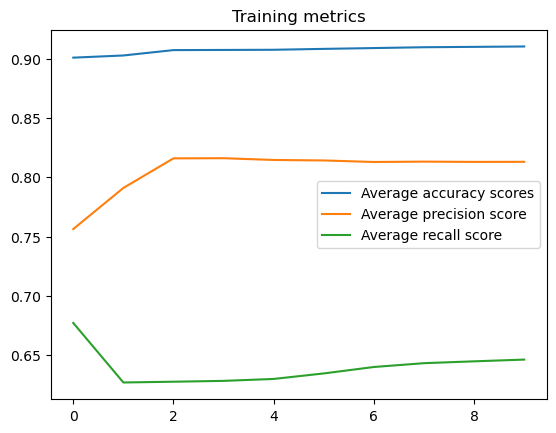

In [38]:
plt.figure()
plt.plot(np.array(The_results['train_acc_scores']).mean(axis=1))
plt.plot(np.array(The_results['train_prec_scores']).mean(axis=1))
plt.plot(np.array(The_results['train_rec_scores']).mean(axis=1))
plt.legend(['Average accuracy scores', 'Average precision score', 'Average recall score'])
plt.title('Training metrics')
plt.show()

In [34]:
train_hl = np.array(The_results['train_ham_loss'])
train_hl

array([[0.34466912, 0.        , 0.        , ..., 0.22196691, 0.22472426,
        0.21737132],
       [0.05882353, 0.05882353, 0.05882353, ..., 0.20220588, 0.21737132,
        0.21277574],
       [0.        , 0.        , 0.        , ..., 0.20220588, 0.21737132,
        0.21231618],
       ...,
       [0.00229779, 0.00091912, 0.00045956, ..., 0.19806985, 0.21507353,
        0.20772059],
       [0.00367647, 0.00091912, 0.00091912, ..., 0.19715074, 0.21231618,
        0.20818015],
       [0.00275735, 0.00091912, 0.00045956, ..., 0.19623162, 0.21047794,
        0.20634191]])

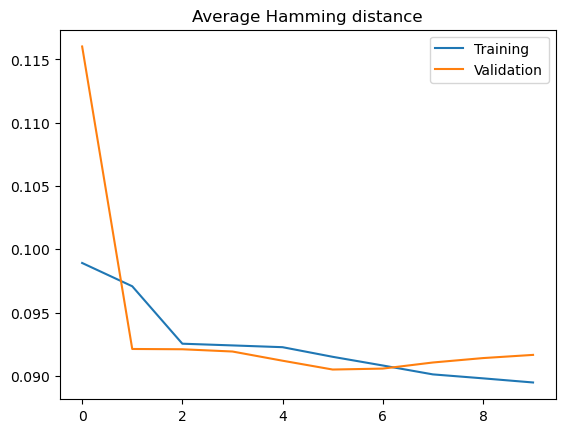

In [41]:
plt.figure()
plt.plot(np.array(The_results['train_ham_loss']).mean(axis=1), label='Training')
plt.plot(np.array(The_results['val_ham_loss']).mean(axis=1), label='Validation')
plt.legend()
plt.title('Average Hamming distance')
plt.show()

## 6) TESTING

In [42]:
# store stats
losses, accuracies = [], []
count = 0
for batch in tqdm(test_dataloader):
    # TODO run prediction_step
    loss, accuracy, predictions = batch_prediction(batch, model, device = 'cuda')

    # append to stats
    losses.append(loss)
    accuracies.append(accuracy)
    if count == 0:
        all_pred = predictions
        count = 1
    else :
        all_pred = np.vstack((all_pred,predictions))
# average val losses and accuracies over batches
losses, accuracies = np.stack(losses).mean(), np.stack(accuracies).mean()
print(f"valloss {losses:.2f}, val accuracy {accuracies*100:.2f}%")

100%|██████████| 65/65 [02:18<00:00,  2.13s/it]

valloss 0.27, val accuracy 90.25


In [36]:
all_pred

array([[0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       [0.       , 1.       , 1.       , ..., 1.       , 1.       ,
        1.       ],
       ...,
       [0.3828125, 0.8359375, 0.75     , ..., 0.984375 , 0.90625  ,
        0.9375   ],
       [0.3984375, 0.84375  , 0.75     , ..., 0.953125 , 0.859375 ,
        0.9296875],
       [0.3984375, 0.84375  , 0.7265625, ..., 0.9140625, 0.8984375,
        0.8125   ]])

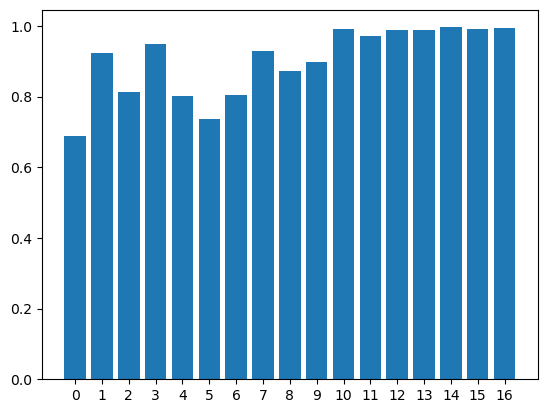

In [45]:
mean_pred = np.stack(all_pred, axis = 0).mean(axis=0)
plt.figure()
plt.bar(x = range(17), height=mean_pred)
plt.xticks(range(17))
plt.title("Accuracy of each class")
plt.show()

# Saving Models

In [46]:
torch.save(model.state_dict(), "model_multilabel_classification.pth")
print("Saved PyTorch Model State to model_multilabel_classification.pth")

Saved PyTorch Model State to model_multilabel_classification.pth
